# PCA

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Read data
# This data is already preprocessed
df = pd.read_csv('out.csv')
df.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


In [3]:
# df = pd.get_dummies(df, columns=['Region'])

In [4]:
df.shape

(227, 20)

In [5]:
# Dropping both 'Country' & 'Region' 
df.drop(['Country', 'Region'], axis=1, inplace=True)

In [6]:
# Convert the data frame to a numpy array
df_to_np = df.to_numpy()

# data scaling
scaler = StandardScaler()
X = scaler.fit_transform(df_to_np)

In [7]:
# Get the covariance matrix from our data
cov = np.cov(X.T)
cov

array([[ 1.00442478e+00,  4.72064664e-01, -2.83152108e-02,
        -6.85007021e-02,  1.09161732e-05,  2.30957216e-02,
        -3.94933424e-02, -4.35677664e-02, -3.09396277e-02,
         1.89033802e-01, -6.10095904e-02, -1.21108290e-01,
        -2.65559351e-02, -4.52749398e-02, -2.84789588e-02,
         3.76425038e-04,  9.95470874e-02, -8.10382961e-02],
       [ 4.72064664e-01,  1.00442478e+00, -6.72130913e-02,
        -9.60506155e-02,  4.76522550e-02, -7.19101610e-03,
         7.24988603e-02,  3.59421659e-02,  5.35957236e-02,
        -8.00263519e-02, -1.44480775e-01,  1.39518889e-01,
        -8.24910722e-02, -6.66829932e-02,  4.02259996e-02,
        -5.06025506e-02,  1.21442370e-01, -5.43188123e-02],
       [-2.83152108e-02, -6.72130913e-02,  1.00442478e+00,
         2.42758942e-01,  1.78777541e-01, -1.44837657e-01,
         1.96616682e-01,  9.54764819e-02,  2.81318248e-01,
        -8.13574184e-02, -3.17952778e-02,  8.22057196e-02,
         6.86068504e-03, -1.59854479e-01, -7.03316040e

In [8]:
def pca(X):
    '''
        Calculate eigen vectors and eigen values for 
        a covariance matrix.
        
        Parameters
        ----------
        X: a covariance matrix
        
        Returns
        -------
        eigen_val: eigen values 
        eigen_vec: eign vectors
    '''
    eig = np.linalg.eig(X)
    eigen_val = eig[0]
    eigen_vec = eig[1]
    return eigen_val, eigen_vec

In [9]:
# Call pca function
eig_vals, eig_vec = pca(cov)

In [10]:
# calculate the cumulative eigenvalues
eig_vals_cumsum = eig_vals.cumsum()/np.sum(eig_vals)
eig_vals_cumsum

array([0.29805844, 0.43583299, 0.53890625, 0.62611531, 0.69926618,
       0.75533695, 0.80455657, 0.84362537, 0.87704149, 0.90706043,
       0.93332639, 0.95413063, 0.97706096, 0.98751417, 0.99224601,
       0.99986306, 0.99999999, 1.        ])

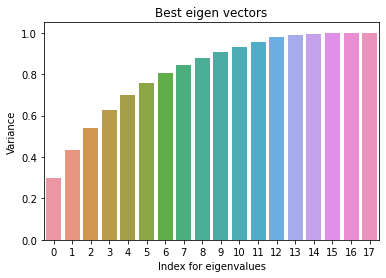

In [11]:
# Draw the cumulative eigenvalues to select how much eigenvalues keeps about 95% of the variance.
sns.barplot(x=np.arange(18), y=eig_vals_cumsum)
plt.xlabel('Index for eigenvalues')
plt.ylabel('Variance')
plt.title('Best eigen vectors')
plt.show()

In [12]:
# Here me can actually see the suitable number of eigen values
(eig_vals_cumsum <= 0.95).sum()

11

In [13]:
eig_vec[:11].shape

(11, 18)

In [14]:
# Projection step in the direction of the high variance features
new_data = X @ eig_vec[:11].T


In [15]:
# Data before applying the pca
X.shape

(227, 18)

In [16]:
# Data before applying the pca, with low number of dimensions
new_data.shape

(227, 11)

In [17]:
# Convert data after applying the pca to a data frame
data_from_pca = pd.DataFrame(new_data)

# Save the data from pca in a new file
data_from_pca.to_csv('new_out.csv', index=False)

# DBSCAN

In [18]:
# read data
df_pca = pd.read_csv('new_out.csv').iloc[:, 1:]
df_pca.head()

,1,2,3,4,5,6,7,8,9,10
0,2.470546,1.947393,3.561001,3.618469,1.598928,0.739733,-1.695859,-1.406650,0.989427,2.150449
1,-0.734091,-0.288280,-1.233166,0.084258,-0.830251,1.224129,0.138959,0.140316,-0.288651,0.027628
2,-0.068520,-0.916306,1.179232,0.903446,-0.494174,-0.975258,0.093174,-0.533309,1.928762,0.274019
3,-2.057896,-1.173156,-1.499484,-0.675407,-1.555166,-0.394498,1.356684,-0.366941,0.097437,-1.083379
4,0.681920,0.293329,0.049644,-1.911718,-0.101077,0.736564,-0.819799,0.908039,0.248648,-1.254856


In [19]:
# df_pca = scaler.fit_transform(df_pca)

In [20]:
# implement the NearestNeighbors to know what is the best epsilon for our DBSCAN model
from sklearn.neighbors import NearestNeighbors

mins = 7
nn = NearestNeighbors(n_neighbors = mins)
nn.fit(df_pca)
distances, _ = nn.kneighbors(df_pca)
distances = np.sort(distances[:, 3], axis=0)

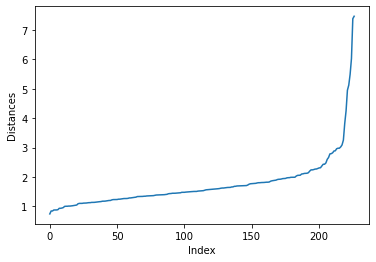

In [21]:
# plot the distance between each point and the farthest seventh point from each
sns.lineplot(x=np.arange(len(distances)), y=distances)
plt.xlabel('Index')
plt.ylabel('Distances')
plt.show()

In [22]:
# Apply DBSCAN with the selected epsilon
from sklearn.cluster import DBSCAN

model = DBSCAN(eps = 2.5, min_samples = 5).fit(df_pca)
df_pca['labels'] = model.labels_

In [23]:
df_pca.head()

,1,2,3,4,5,6,7,8,9,10,labels
0,2.470546,1.947393,3.561001,3.618469,1.598928,0.739733,-1.695859,-1.406650,0.989427,2.150449,-1
1,-0.734091,-0.288280,-1.233166,0.084258,-0.830251,1.224129,0.138959,0.140316,-0.288651,0.027628,0
2,-0.068520,-0.916306,1.179232,0.903446,-0.494174,-0.975258,0.093174,-0.533309,1.928762,0.274019,0
3,-2.057896,-1.173156,-1.499484,-0.675407,-1.555166,-0.394498,1.356684,-0.366941,0.097437,-1.083379,0
4,0.681920,0.293329,0.049644,-1.911718,-0.101077,0.736564,-0.819799,0.908039,0.248648,-1.254856,0


In [24]:
# calculate silhouette score
silhouette_score(df, df_pca['labels'])

0.8016031619906552